<a href="https://colab.research.google.com/github/nahidosen/ProblemSolving/blob/main/Project_Euler_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notes

For local runtime with Google Colab:
* jupyter serverextension enable --py jupyter_http_over_ws
* jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

## Problem 1
### Multiples of 3 or 5

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

In [ ]:
# noob
n = 1000

sum = 0
for i in range(n):
    if i % 3 == 0 or i % 5 == 0:
        sum += i

print(sum)


In [ ]:
#pro
n = 1000

i3 = 3
i5 = 5

sum = 0
for i in range(i3, n, i3):
  sum += i
  
for i in range(i5, n, i5):
  if i % i3 != 0:
    sum += i

print(sum)


In [47]:
#pro pro

import multiprocessing

n = 1000

def multiples_of_3(queue):
  ret = queue.get()
  
  sum = 0
  for i in range(3, n, 3):
    sum += i
  
  ret['3'] = sum
  queue.put(ret)

def multiples_of_5(queue):
  ret = queue.get()

  sum = 0
  for i in range(5, n, 5):
    if i % 3 != 0:
      sum += i

  ret['5'] = sum
  queue.put(ret)


ret = {}
queue = multiprocessing.Queue()
queue.put(ret)
p1 = multiprocessing.Process(target=multiples_of_3, args=(queue,))
p2 = multiprocessing.Process(target=multiples_of_5, args=(queue,))
p1.start()
p2.start()

p1.join()
p2.join()
sum = list(queue.get().values())
print(sum[0] + sum[1])

2333333316666668


In [55]:
# Ulta Pro Max

def until_n(n, num):
# nth term = a+(n-1)*difference || NOT here though
  if n % num == 0:
    max_num = n - num
  else:
    max_num = n // num
    max_num = max_num * num
  return max_num

def num_of_terms(num):
  terms = until_n(n, num) // num
  return terms

def sum_of_series(n, num):
# sum of first_num to last_num = n*(a+b)/2
  semi_sum = num_of_terms(num) * (num + until_n(n, num))
  semi_sum = semi_sum // 2
  return semi_sum

n = 1000

num1 = 3
num2 = 5

print(sum_of_series(n, num1) + sum_of_series(n, num2) - sum_of_series(n, num1*num2))


233168


## Problem 2
### Even Fibonacci numbers

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [ ]:
fibo = [0, 1, 0]
sum = 0

while fibo[2] < 4000000:          # Fibo(n) = Fibo(n-1) + Fibo(n-2)
  
  fibo[2] = fibo[0] + fibo[1]     # 0, 1, 1   # 1, 1, 2   # 1, 2, 3 
  fibo[0] = fibo[1]               # 1, 1, 1   # 1, 1, 2   # 2, 2, 3 
  fibo[1] = fibo[2]               # 1, 1, 1   # 1, 2, 2   # 2, 3, 3 
  
  if fibo[2] % 2 == 0:
      sum = sum + fibo[2]
    
print(sum)

## Problem 3
### Largest prime factor

The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

In [ ]:
from math import sqrt, ceil

def isPrime(x):
  for i in range(2, ceil(sqrt(x))+1):
    if x % i == 0:
      return False
  return True


num = 600851475143
divisors = []
prime_num = 0
upper_bound = ceil(num/2) + 1

for i in range(2, upper_bound):
  if num % i == 0:                                # whether num is divisible by i
    divisors.append(i)
    divisors.append(int(num / i))

    upper_bound = int(num / i) + 1        
    if i > upper_bound:
      break

divisors = list(set(divisors))
divisors.sort()

for i in divisors:
  if isPrime(i):
    prime = i

print(prime)


## Problem 4
### Largest palindrome product

A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.

In [ ]:
palindrome = 0
a = 0
b = 0
for i in range(999, 99, -1):
  for j in range(999, 99, -1):

    mul = i * j    
    if str(mul) == str(mul)[::-1] and palindrome < mul:
      palindrome = mul
      a = i
      b = j    

print(f'{a} * {b} = {palindrome}')


## Problem 5
### Smallest multiple

2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

What is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20?

In [ ]:
#noob

until = mul = 20

while True:
  
  flag = 0
  for i in range(1, until +1):
    if mul % i == 0:
      flag += 1
    
  if flag == until:
    break

  mul += 1

print(mul)

In [ ]:
#pro
from math import sqrt, ceil

def isPrime(x):
  for i in range(2, ceil(sqrt(x)) +1):
    if x % i == 0:
      return False
  return True

def factors(x):
  factor = []
  for i in range(1, x+1):
    if x % i == 0:
      factor.append(i)
  
  return factor

until = 20
fact = []

for i in range(1, until +1):
  fact.append(factors(i))


print(fact)

# Unfinished business

[[1], [1, 2], [1, 3], [1, 2, 4], [1, 5], [1, 2, 3, 6], [1, 7], [1, 2, 4, 8], [1, 3, 9], [1, 2, 5, 10], [1, 11], [1, 2, 3, 4, 6, 12], [1, 13], [1, 2, 7, 14], [1, 3, 5, 15], [1, 2, 4, 8, 16], [1, 17], [1, 2, 3, 6, 9, 18], [1, 19], [1, 2, 4, 5, 10, 20]]


## Problem 6
### Sum square difference

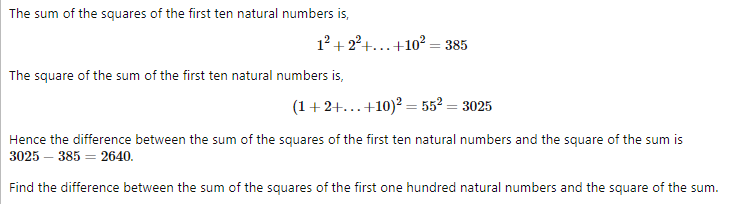

In [ ]:
#Later
n = 100

sum_of_squares = 0
square_of_sums = 0

for i in range(1, n +1):
  sum_of_squares += i**2
  square_of_sums += i

print(square_of_sums**2 - sum_of_squares)


25164150


## Problem 7
### 10001st prime

By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?

In [ ]:
from math import sqrt, ceil

def isPrime(x):
  for i in range(2, ceil(sqrt(x)) +1):
    if x % i == 0:
      return False
  return True

##############
wanted = 100001#th prime
##############

prime = 0
num = 1
while True:
  
  if isPrime(num):
    prime += 1
    
  if prime == wanted:
    break
  
  num +=1

print(prime, num)

In [ ]:
#Dont try this. a waste of time

from math import sqrt, ceil

def isPrime(x, primes):
  
  for i in primes:

    if x > 2 and x % i == 0:
      return False, primes

    elif x < 2:
      return False, primes

  primes.append(x)
  return True, primes

##############
wanted = 10001#th prime number
##############

prime = 0
num = 1
primes = [2]

while True:

  what, primes = isPrime(num, primes)
  if what:
    prime += 1

  if prime == wanted:
    break
  num +=1

print(prime, num)

## Problem 8
### Largest product in a series

The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.


73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450


Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

In [ ]:
largeNum = '7316717653133062491922511967442657474235534919493496983520312774506326239578318016984801869478851843858615607891129494954595017379583319528532088055111254069874715852386305071569329096329522744304355766896648950445244523161731856403098711121722383113622298934233803081353362766142828064444866452387493035890729629049156044077239071381051585930796086670172427121883998797908792274921901699720888093776657273330010533678812202354218097512545405947522435258490771167055601360483958644670632441572215539753697817977846174064955149290862569321978468622482839722413756570560574902614079729686524145351004748216637048440319989000889524345065854122758866688116427171479924442928230863465674813919123162824586178664583591245665294765456828489128831426076900422421902267105562632111110937054421750694165896040807198403850962455444362981230987879927244284909188845801561660979191338754992005240636899125607176060588611646710940507754100225698315520005593572972571636269561882670428252483600823257530420752963450'

maximum = -999999

for i in range(len(largeNum)):

  if i+12 <= len(largeNum):
    tempNum = largeNum[i:i+13]

    mul = 1

    for j in tempNum:
      mul *= int(j)

    if mul > maximum:
      maximum = mul
      maxNum = tempNum

print(maxNum, maximum)

## Problem 9
### Special Pythagorean triplet

A Pythagorean triplet is a set of three natural numbers, a < b < c, for which,

a2 + b2 = c2
For example, 32 + 42 = 9 + 16 = 25 = 52.

There exists exactly one Pythagorean triplet for which a + b + c = 1000.
Find the product abc.

In [ ]:
from math import sqrt

sum_equal = 1000
power_of = 2
flag = 1

for c in range(1, sum_equal):
  for b in range(1, c):
    for a in range(1, b):
      if a+b+c == sum_equal and a**power_of + b**power_of == c**power_of:
        print(f'{a} + {b} + {c} = {sum_equal}, {a**power_of} + {b**power_of} = {c**power_of}, Product = {a*b*c}')
        flag = 0
        break
    if flag == 0:
      break
  if flag == 0:
    break


## Problem 10
### Summation of primes

The sum of the primes below 10 is 2 + 3 + 5 + 7 = 17.

Find the sum of all the primes below two million.

In [ ]:
from math import sqrt

def isPrime(x):
  for i in range(2, int(sqrt(x)) +1):
    if x % i == 0:
      return False
  return True


until = 2000000
prime_suspects = []

for i in range(2, until):
  if isPrime(i):
    prime_suspects.append(i)

print(prime_suspects)
print(sum(prime_suspects))

## Problem 11
### Largest prime factor

The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

Skipping Work
=============

Commander Lambda is all about efficiency, including using her the bunny workers for manual labor. But no one's been properly monitoring the labor shifts for a while and they've gotten quite mixed up. You've been given the task of fixing them, but after you wrote up new shifts you realized that some bunny workers had been transferred to a different area and aren't available for their assigned shifts. Manually sorting through each shift list to compare against work area lists will take forever -- remember, Commander Lambda loves efficiency!

Given two almost identical lists of worker IDs x and y where one of the lists contains an additional ID, write a function solution(x, y) that compares the lists and returns the additional ID.

For example, given the lists x = [13, 5, 6, 2, 5] and y = [5, 2, 5, 13], the function solution(x, y) would return 6 because the list x contains the integer 6 and the list y doesn't. Given the lists x = [14, 27, 1, 4, 2, 50, 3, 1] and y = [2, 4, -4, 3, 1, 1, 14, 27, 50], the function solution(x, y) would return -4 because the list y contains the integer -4 and the list x doesn't.

In each test case, the lists x and y will always contain n non-unique integers where n is at least 1 but never more than 99, and one of the lists will contain an additional unique integer which should be returned by the function. The same n non-unique integers will be present on both lists, but they might appear in a different order like in the examples above. Commander Lambda likes to keep the numbers short, so every worker ID will be between -1000 and 1000.

In [ ]:
def solution(x, y):
    # Your code here
    
    if len(x) > len(y):
        longer  = x
        shorter = y
    else:
        longer  = y
        shorter = x
    
    for i in longer:
        if i not in shorter:
            return i
            
    return None

Don't Get Volunteered!
======================

As a henchman on Commander Lambda's space station, you're expected to be resourceful, smart, and a quick thinker. It's not easy building a doomsday device and ordering the bunnies around at the same time, after all! In order to make sure that everyone is sufficiently quick-witted, Commander Lambda has installed new flooring outside the henchman dormitories. It looks like a chessboard, and every morning and evening you have to solve a new movement puzzle in order to cross the floor. That would be fine if you got to be the rook or the queen, but instead, you have to be the knight. Worse, if you take too much time solving the puzzle, you get "volunteered" as a test subject for the LAMBCHOP doomsday device!

To help yourself get to and from your bunk every day, write a function called solution(src, dest) which takes in two parameters: the source square, on which you start, and the destination square, which is where you need to land to solve the puzzle.  The function should return an integer representing the smallest number of moves it will take for you to travel from the source square to the destination square using a chess knight's moves (that is, two squares in any direction immediately followed by one square perpendicular to that direction, or vice versa, in an "L" shape).  Both the source and destination squares will be an integer between 0 and 63, inclusive, and are numbered like the example chessboard below:

-------------------------
| 0| 1| 2| 3| 4| 5| 6| 7|
-------------------------
| 8| 9|10|11|12|13|14|15|
-------------------------
|16|17|18|19|20|21|22|23|
-------------------------
|24|25|26|27|28|29|30|31|
-------------------------
|32|33|34|35|36|37|38|39|
-------------------------
|40|41|42|43|44|45|46|47|
-------------------------
|48|49|50|51|52|53|54|55|
-------------------------
|56|57|58|59|60|61|62|63|
-------------------------

Languages
=========

To provide a Python solution, edit solution.py
To provide a Java solution, edit Solution.java

Test cases
==========
Your code should pass the following test cases.
Note that it may also be run against hidden test cases not shown here.

-- Python cases --
Input:
solution.solution(0, 1)
Output:
    3

Input:
solution.solution(19, 36)
Output:
    1

-- Java cases --
Input:
Solution.solution(19, 36)
Output:
    1

Input:
Solution.solution(0, 1)
Output:
    3

In [ ]:
axis = []
for row in range(8):
    for col in range(8):
        axis.append([row, col])

for i, value in enumerate(axis):
  print(value, end=' ') #i
  if (i+1) % 8 ==0:
    print()

a ='| 0| 1| 2| 3| 4| 5| 6| 7|\n\
| 8| 9|10|11|12|13|14|15|\n\
|16|17|18|19|20|21|22|23|\n\
|24|25|26|27|28|29|30|31|\n\
|32|33|34|35|36|37|38|39|\n\
|40|41|42|43|44|45|46|47|\n\
|48|49|50|51|52|53|54|55|\n\
|56|57|58|59|60|61|62|63|'

print()
print(a)

[0, 0] [0, 1] [0, 2] [0, 3] [0, 4] [0, 5] [0, 6] [0, 7] 
[1, 0] [1, 1] [1, 2] [1, 3] [1, 4] [1, 5] [1, 6] [1, 7] 
[2, 0] [2, 1] [2, 2] [2, 3] [2, 4] [2, 5] [2, 6] [2, 7] 
[3, 0] [3, 1] [3, 2] [3, 3] [3, 4] [3, 5] [3, 6] [3, 7] 
[4, 0] [4, 1] [4, 2] [4, 3] [4, 4] [4, 5] [4, 6] [4, 7] 
[5, 0] [5, 1] [5, 2] [5, 3] [5, 4] [5, 5] [5, 6] [5, 7] 
[6, 0] [6, 1] [6, 2] [6, 3] [6, 4] [6, 5] [6, 6] [6, 7] 
[7, 0] [7, 1] [7, 2] [7, 3] [7, 4] [7, 5] [7, 6] [7, 7] 

| 0| 1| 2| 3| 4| 5| 6| 7|
| 8| 9|10|11|12|13|14|15|
|16|17|18|19|20|21|22|23|
|24|25|26|27|28|29|30|31|
|32|33|34|35|36|37|38|39|
|40|41|42|43|44|45|46|47|
|48|49|50|51|52|53|54|55|
|56|57|58|59|60|61|62|63|


In [ ]:
def isvalid(move):
  if any([
    move[0] < 0,
    move[0] > 7,
    move[1] < 0,
    move[1] > 7
  ]):
    return False
  else:
    return True
    
def num_to_row_col(num):
# from number to row and column Conversion
  axis = []
  for row in range(8):
    for col in range(8):
      axis.append([row, col])
  
  return axis[num]

def row_col_to_num(r, c):
# from row and column to number Conversion
  axis = []
  for row in range(8):
    for col in range(8):
      axis.append([row, col])
    
  return axis.index([r, c])

def closest(valid_moves, dest):
# returns closest valid move as a list of [row, col]
  destrow, destcol = num_to_row_col(dest)
  for i in valid_moves:
    


  return i


def solution(src, dest):
            
  startrow, startcol = num_to_row_col(src)
  destrow, destcol = num_to_row_col(dest)
  
  # Move Definition
  moves = [i for i in range(8)]
  
  moves[0] = up_left  = [-2,-1]
  moves[1] = up_right = [-2, 1]
  
  moves[2] = right_up   = [-1, 2]
  moves[3] = right_down = [ 1, 2]
  
  moves[4] = down_right = [2, 1]
  moves[5] = down_left =  [2,-1]
  
  moves[6] = left_down = [ 1, -2]
  moves[7] = left_up =   [-1, -2]
  
  valid_moves = []
  for i in moves:
    if isvalid(row + i[0] , col + i[1]):
      row = row + i[0]
      col = col + i[1]
          
      valid_moves.append([row, col])

  for i in valid_moves:
    if srow - i[0] == 0 and scol - i[1] == 0:
      pass
    elif srow - i[0] == 0 and scol - i[1] == 0:




Have the function BracketCombinations(num) read num which will be an integer greater than or equal to zero, and return the number of valid combinations that can be formed with num pairs of parentheses. For example, if the input is 3, then the possible combinations of 3 pairs of parenthesis, namely: ()()(), are ()()(), ()(()), (())(), ((())), and (()()). There are 5 total combinations when the input is 3, so your program should return 5.

In [ ]:
from itertools import permutations

def isvalid(brackets):
  count = 0

  for i in brackets:
    flag = 0

    for j in i:

      if j % 2 == 0:
        flag += 1
      else:
        flag -= 1

      if flag < 0:
        break

    if flag == 0:
      count += 1

  return count


def BracketCombinations(num):

  # ( = 2
  # ) = 1


  brackets = []
  for i in range(num):
    brackets.append(1)
  for i in range(num):
    brackets.append(2)

  pern = permutations(brackets)
  pern = list(set(pern))
  
  num = isvalid(pern)      

  return num

# keep this function call here 
print(BracketCombinations(input()))